In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [11]:
df = pd.read_csv(r'../data/processed/data.csv')

# Separate features and labels
X = df[[column for column in list(df.columns) if column != 'label' and column != 'session_id' and column != 'url' and column != 'referrer']]
y = df['label']

### PCA plot

Counter({'advanced_bot': 170, 'moderate_bot': 170, 'human': 109})


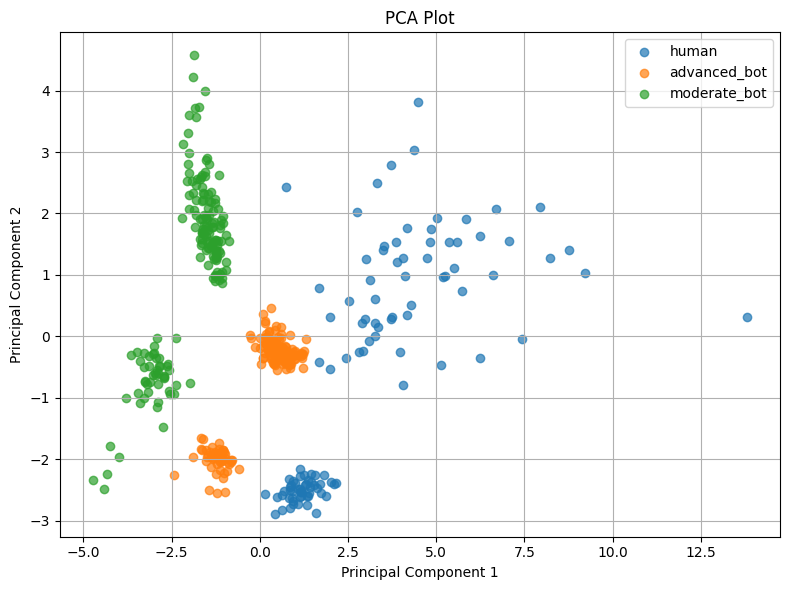

In [12]:
def pca_plot(x,y):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA to reduce to 2 components
    pca = PCA(n_components=2, svd_solver='full')
    principal_components = pca.fit_transform(X_scaled)

    # Create a new DataFrame for plotting
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['label'] = y

    # Plot
    plt.figure(figsize=(8, 6))
    for label in pca_df['label'].unique():
        subset = pca_df[pca_df['label'] == label]
        plt.scatter(subset['PC1'], subset['PC2'], label=f'{label}', alpha=0.7)

    plt.title('PCA Plot')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print(Counter(y))
pca_plot(X, y)

### Borderline SMOTE

https://www.analyticsvidhya.com/blog/2022/05/handling-imbalanced-data-with-imbalance-learn-in-python/

Counter({'human': 500, 'advanced_bot': 500, 'moderate_bot': 500})


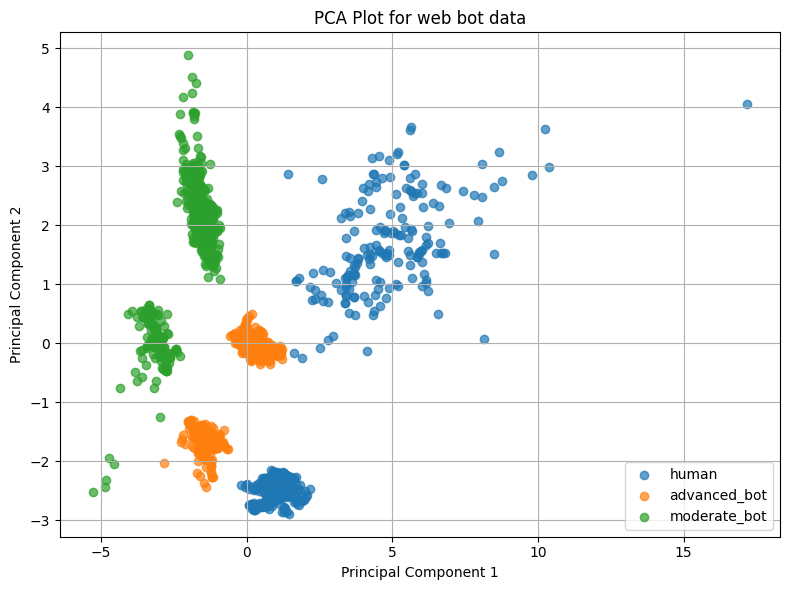

In [7]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

# Separate features and labels
X = df[[column for column in list(df.columns) if column != 'label' and column != 'session_id' and column != 'url' and column != 'referrer']]
y = df['label']

# oversample = BorderlineSMOTE()
oversample = BorderlineSMOTE(sampling_strategy={'human':500,'advanced_bot':500,'moderate_bot':500})

X,y = oversample.fit_resample(X,y)

print(Counter(y))

pca_plot(X, y)

In [8]:
# Combine into a single DataFrame
oversampled_df = pd.concat([pd.DataFrame(X), pd.Series(y, name='label')], axis=1)

In [9]:
oversampled_df.to_csv('../data/processed/oversampled.csv', index=False)